In [1]:
#Цель проекта: подготовить данные для построения будущей модели
#Задачи проекта: Ознакомиться с данными, проверить их целенность, проанализировать данные на предмет зависимости со значением 'score'

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math

from itertools import combinations
from scipy.stats import ttest_ind 

In [2]:
#Добавление функиций

#Проверка столбца (dtype object) на наличие уникальных значений и их количество 
def object_check(column):
    display(pd.DataFrame(column.value_counts()))
    print(column.unique())

#Проверка столбца (dtype float) при помощи гистограммы и 
#его характеристики (количество значений в столбце, среднее, стандартное отклонение, минимальное,
#25-й процентиль, 50-й процентиль, 75-й процентиль и максимальное)
def float_check(column):
    column.hist()
    print(column.describe())
    
    
#Проверка столбца (dtype float) двумя методами для дополнительного анализа уникальных значений, что поможет вывести наличие NaN    
def full_check(column):
    return object_check(column), float_check(column)


#Проверка нулевой гипотезы о том, что распределения баллов студентов по различным параметрам неразличимы
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
#Отображение информации (dtype float): 25-й перцентиль, 75-й перцентиль, межквартильный размах (IQR), границы выбросов.           
#Отображение размаха между границами выбросов и значения вне этих границ
def quantile_plus(column, range_begin, range_end, not_more_then):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    f = q1 - 1.5*IQR
    l = q3 + 1.5*IQR
    print(
        '25-й перцентиль: {},'.format(q1),
        '75-й перцентиль: {},'.format(q3),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{}, {}].".format(f, l))
    column.loc[column.between(
        f, l)].hist(bins=10, range=(range_begin, range_end), label='IQR')

    column.loc[column <= not_more_then].hist(
        alpha=0.5, bins=10, range=(range_begin, range_end), label='Здравый смысл')

    plt.legend()
    
    
#Инструмент для анализа номинативных столбцов (dtype object) и их взаимосвзяь с успеваемостью по математике
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot для ' + column)
    plt.show()
    
# Проверка отсутствия значений в столбце
def precent_check(column):
    math = 100 - ((df[column].count() * 100) / 395)
    if math != 0.0:
        print("В столбце",column,"отсутствует", '\033[4m' + str(round(math, 2)),"процентов" + '\033[0m',"информации.")
        
# Для создания dummy переменные
def find_item(cell):
    if item in cell:
        return 1
    return 0

# ---------------------------- Data ----------------------------

# Информация

* <i> school </i>: аббревиатура школы, в которой учится ученик
* <i> sex </i>: пол ученика (F - female, M - male) 
* <i> age </i>: возраст ученика (от 15 до 22)
* <i> address </i>: тип адреса ученика ('U' - городской, 'R' - за городом)
* <i> famsize </i>: размер семьи('LE3' <= 3, 'GT3' >3)
<br />
<br />
* <i> Pstatus </i>: статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
* <i> Medu </i>: образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
* <i> Fedu </i>: образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
* <i> Mjob </i>: бота матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
* <i> Fjob </i>: работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
<br />
<br />
* <i> reason </i>: причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
* <i> guardian </i>: опекун ('mother' - мать, 'father' - отец, 'other' - другое)
* <i> traveltime </i>: время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) 
* <i> studytime </i>: время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
* <i> failures </i>: количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
<br />
<br />
* <i> schoolsup </i>: дополнительная образовательная поддержка (yes или no)
* <i> famsup </i>: семейная образовательная поддержка (yes или no)
* <i> paid </i>: дополнительные платные занятия по математике (yes или no)
* <i> activities </i>: ельные внеучебные занятия (yes или no)
* <i> nursery </i>: посещал детский сад (yes или no)
* <i> granular </i>: частоте раздробленного обучения вне школы в течение 7 дней
<br />
<br />
* <i> higher </i>: хочет получить высшее образование (yes или no)
* <i> internet </i>: наличие интернета дома (yes или no)
* <i> romantic </i>: в романтических отношениях (yes или no)
* <i> famrel </i>: семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
* <i> freetime </i>: свободное время после школы (от 1 - очень мало до 5 - очень мого)
<br />
<br />
* <i> goout </i>: проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
* <i> health </i>: текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
* <i> absences </i>: количество пропущенных занятий
* <i> score </i>: баллы по госэкзамену по математике

In [3]:
df = pd.read_csv('stud_math.xls') #присваиваем значению df таблицу, которые мы прочли с помощью pandas  

In [4]:
display(df.head(10))
df.info()

#Осмотр таблицы, выводим первые 10 строк [0:10]
#Видим значения NaN в номинативных столбцах (dtype object(17)) и числовых столбцах (dtype float(12) и dtype int(1))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Предобрабокта

In [5]:
pd.set_option('display.max_rows', 50) #показывать больше строк
pd.set_option('display.max_columns', 50) #показывать больше колонок


In [6]:
# Проверим столбцы, в которых отсутствует информация
for col in df:
    precent_check(col)

В столбце address отсутствует 4.3 процентов информации.
В столбце famsize отсутствует 6.84 процентов информации.
В столбце Pstatus отсутствует 11.39 процентов информации.
В столбце Medu отсутствует 0.76 процентов информации.
В столбце Fedu отсутствует 6.08 процентов информации.
В столбце Mjob отсутствует 4.81 процентов информации.
В столбце Fjob отсутствует 9.11 процентов информации.
В столбце reason отсутствует 4.3 процентов информации.
В столбце guardian отсутствует 7.85 процентов информации.
В столбце traveltime отсутствует 7.09 процентов информации.
В столбце studytime отсутствует 1.77 процентов информации.
В столбце failures отсутствует 5.57 процентов информации.
В столбце schoolsup отсутствует 2.28 процентов информации.
В столбце famsup отсутствует 9.87 процентов информации.
В столбце paid отсутствует 10.13 процентов информации.
В столбце activities отсутствует 3.54 процентов информации.
В столбце nursery отсутствует 4.05 процентов информации.
В столбце studytime, granular отсутс

In [7]:
# Для столбцов типа float64 или int64 заменим пустое значение на медиану столбца

for col in df:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
          df[col].fillna(df[col].median(),inplace = True)

In [8]:
# Проверим количество столбцы после замены выше
# Остались только столбцы типа object, но NaN значения 
# в них имеют тип int

for col in df:
    precent_check(col)

В столбце address отсутствует 4.3 процентов информации.
В столбце famsize отсутствует 6.84 процентов информации.
В столбце Pstatus отсутствует 11.39 процентов информации.
В столбце Mjob отсутствует 4.81 процентов информации.
В столбце Fjob отсутствует 9.11 процентов информации.
В столбце reason отсутствует 4.3 процентов информации.
В столбце guardian отсутствует 7.85 процентов информации.
В столбце schoolsup отсутствует 2.28 процентов информации.
В столбце famsup отсутствует 9.87 процентов информации.
В столбце paid отсутствует 10.13 процентов информации.
В столбце activities отсутствует 3.54 процентов информации.
В столбце nursery отсутствует 4.05 процентов информации.
В столбце higher отсутствует 5.06 процентов информации.
В столбце internet отсутствует 8.61 процентов информации.
В столбце romantic отсутствует 7.85 процентов информации.


In [9]:
# Заменим значения на Unknown, 
# это пригодится нам позже, при создании dummy переменных

df = df.astype(object).replace(np.nan, 'Unknown')

In [10]:
#Меняем название столбца 
df = df.rename(columns={"studytime, granular": "studytime_granular"})

# Анализ и обработка

In [11]:
object_check(df.school)

,school
GP,349
MS,46


['GP' 'MS']


In [12]:
object_check(df.sex)

,sex
F,208
M,187


['F' 'M']


,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


[18 17 15 16 19 22 20 21]
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


(None, None)

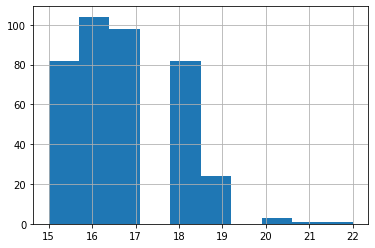

In [13]:
full_check(df.age)

In [14]:
object_check(df.address)

,address
U,295
R,83
Unknown,17


['U' 'Unknown' 'R']


In [15]:
object_check(df.famsize)

,famsize
GT3,261
LE3,107
Unknown,27


['Unknown' 'GT3' 'LE3']


In [16]:
object_check(df.Pstatus)

,Pstatus
T,314
Unknown,45
A,36


['A' 'Unknown' 'T']


,Medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


[4. 1. 3. 2. 0.]
count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


(None, None)

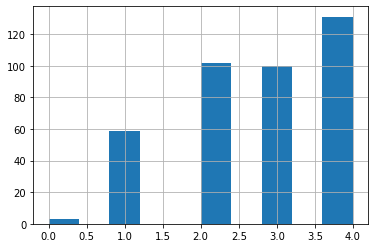

In [17]:
full_check(df.Medu)

In [18]:
df.Fedu.value_counts()

2.0     130
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

,Fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


[4. 1. 2. 3. 0.]
count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


(None, None)

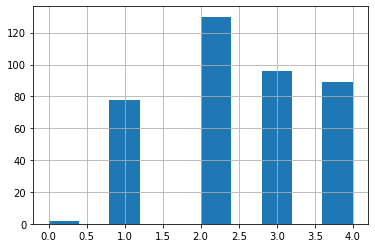

In [19]:
# Значение "40.0" меняем на "4.0", есть большая вероятность, что лишняя ноль была добавлена случайно
df.Fedu = df.Fedu.astype(str).apply(lambda x: float(x.replace('40.0', '4.0')))
full_check(df.Fedu)

In [20]:
object_check(df.Mjob)

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
Unknown,19


['at_home' 'health' 'other' 'services' 'teacher' 'Unknown']


In [21]:
object_check(df.Fjob)

,Fjob
other,197
services,102
Unknown,36
teacher,29
at_home,16
health,15


['teacher' 'other' 'Unknown' 'health' 'services' 'at_home']


In [22]:
object_check(df.reason)

,reason
course,137
home,104
reputation,103
other,34
Unknown,17


['course' 'other' 'home' 'reputation' 'Unknown']


In [23]:
object_check(df.guardian)

,guardian
mother,250
father,86
Unknown,31
other,28


['mother' 'father' 'other' 'Unknown']


,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


[2. 1. 3. 4.]
count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


(None, None)

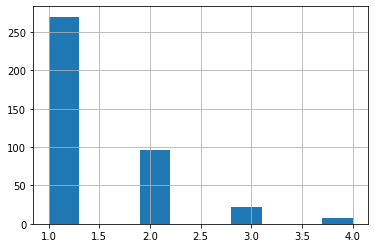

In [24]:
full_check(df.traveltime)

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


[2. 3. 1. 4.]
count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


(None, None)

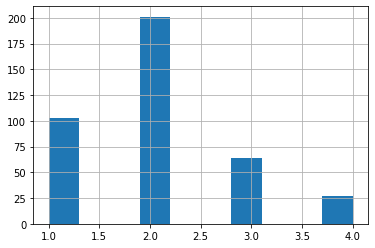

In [25]:
full_check(df.studytime)

,failures
0.0,315
1.0,49
2.0,16
3.0,15


[0. 3. 2. 1.]
count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


(None, None)

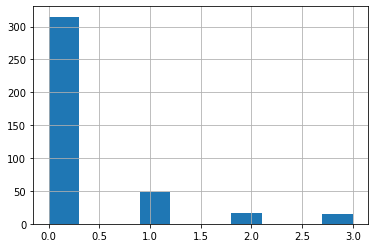

In [26]:
full_check(df.failures)

In [27]:
object_check(df.schoolsup)

,schoolsup
no,335
yes,51
Unknown,9


['yes' 'no' 'Unknown']


In [28]:
object_check(df.famsup)

,famsup
yes,219
no,137
Unknown,39


['no' 'yes' 'Unknown']


In [29]:
object_check(df.paid)

,paid
no,200
yes,155
Unknown,40


['no' 'Unknown' 'yes']


In [30]:
object_check(df.activities)

,activities
yes,195
no,186
Unknown,14


['no' 'yes' 'Unknown']


In [31]:
object_check(df.nursery)

,nursery
yes,300
no,79
Unknown,16


['yes' 'no' 'Unknown']


In [32]:
df.studytime_granular.value_counts()

-6.0     201
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

,studytime_granular
6.0,201
3.0,103
9.0,64
12.0,27


[ 6.  9.  3. 12.]
count    395.000000
mean       6.113924
std        2.503740
min        3.000000
25%        3.000000
50%        6.000000
75%        6.000000
max       12.000000
Name: studytime_granular, dtype: float64


(None, None)

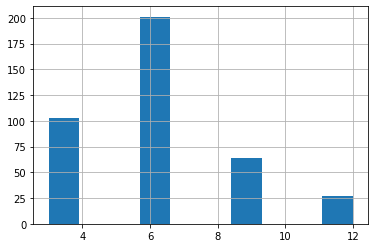

In [33]:
df.studytime_granular = df.studytime_granular.astype(
    str).apply(lambda x: float(x.replace('-', '')))
full_check(df.studytime_granular)

In [34]:
object_check(df.higher)

,higher
yes,356
Unknown,20
no,19


['yes' 'Unknown' 'no']


In [35]:
object_check(df.internet)

,internet
yes,305
no,56
Unknown,34


['Unknown' 'yes' 'no']


In [36]:
object_check(df.romantic)

,romantic
no,240
yes,124
Unknown,31


['no' 'Unknown' 'yes']


In [37]:
df.famrel.value_counts()

 4.0    209
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


[4. 5. 3. 1. 2.]
count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64


(None, None)

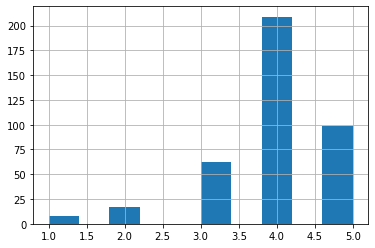

In [38]:
#Меняем минус на ''
df.famrel = df.famrel.astype(str).apply(
    lambda x: float(x.replace('-1.0', '1.0')))
full_check(df.famrel)

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


[3. 2. 4. 1. 5.]
count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


(None, None)

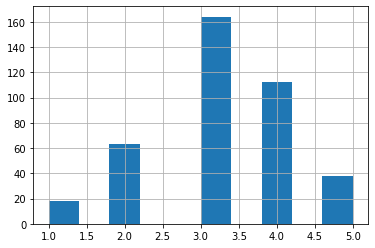

In [39]:
full_check(df.freetime)

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


[4. 3. 2. 1. 5.]
count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


(None, None)

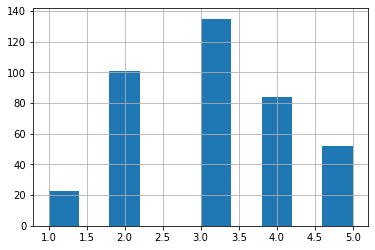

In [40]:
full_check(df.goout)

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


[3. 5. 1. 2. 4.]
count    395.000000
mean       3.549367
std        1.372118
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


(None, None)

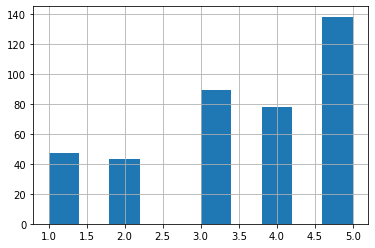

In [41]:
full_check(df.health)

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


[  6.   4.  10.   2.   0.  16.  14.   7.   8.  25.  12.  54.  18.  26.
  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.  30.
  19.   9.  11.  38.  40.  23.  17. 212.]
count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


(None, None)

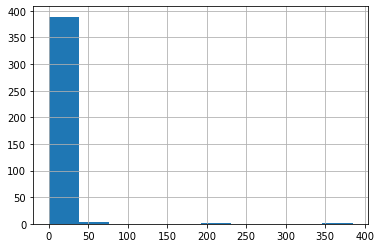

In [42]:
#выдаёт сомнительные значения (выбросы). Необходимо узнать границы.
full_check(df.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


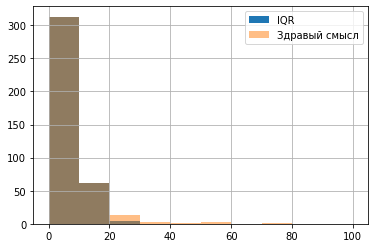

In [43]:
#Здравый смысл показывает границы выбросов, что даёт нам понять, до какого значения оптимально учитывать значения.
quantile_plus(df.absences, 0, 100, 100)

In [44]:
#Устанавливаем ограничения для значений, исходя из проверки выше
df = df.loc[df.absences <= 40]

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


[ 6.  4. 10.  2.  0. 16. 14.  7.  8. 25. 12. 18. 26. 20. 24. 28.  5. 13.
 15. 22.  3. 21.  1. 30. 19.  9. 11. 38. 40. 23. 17.]
count    390.000000
mean       5.266667
std        6.242377
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       40.000000
Name: absences, dtype: float64


(None, None)

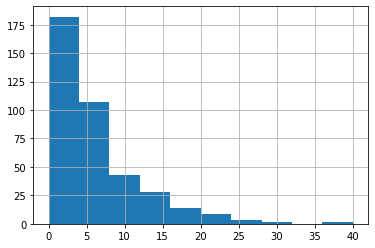

In [45]:
full_check(df.absences)

,score
50.0,54
55.0,51
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,25
80.0,16


[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  20.]
count    390.000000
mean      52.282051
std       22.816975
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


(None, None)

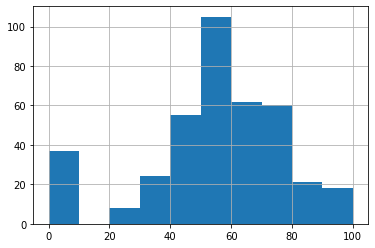

In [46]:
full_check(df.score)

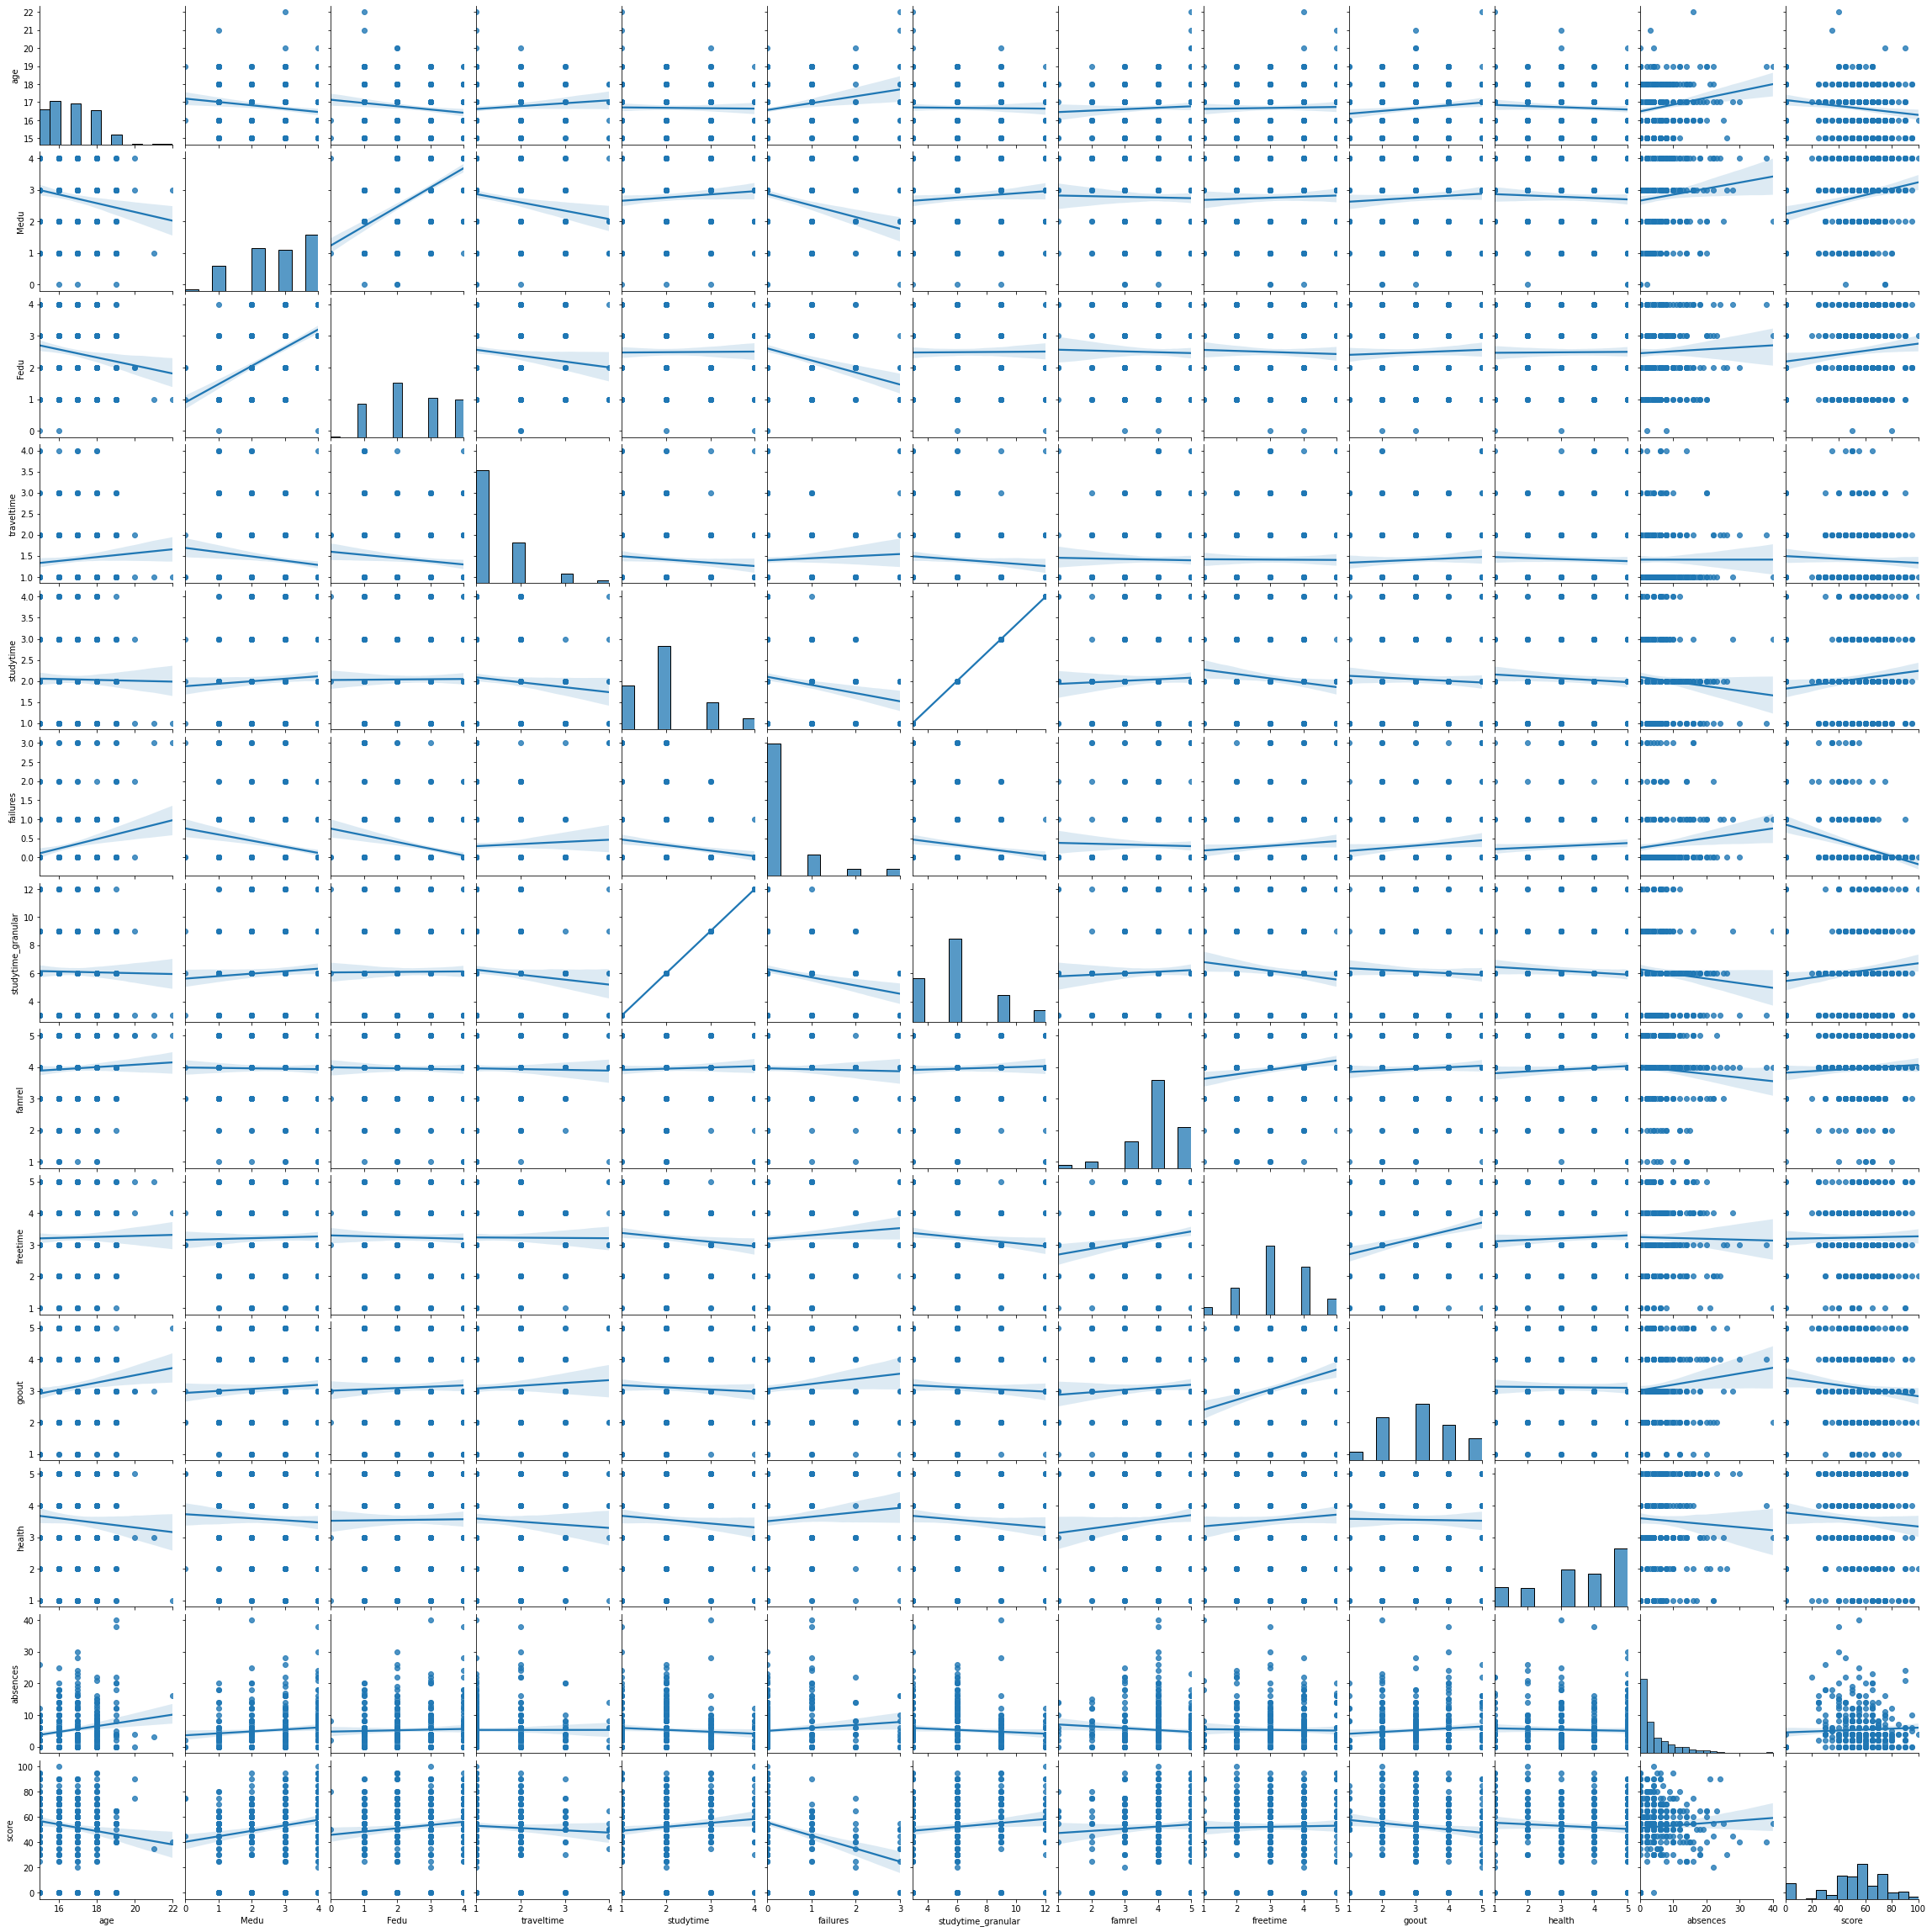

In [47]:
#Определяем зависимость переменных. Но значений слишком много. 
sns.pairplot(df, kind='reg')

In [48]:
#Анализируем данные и для наглядности используем матрицу корреляций 
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160151,-0.151390,0.086332,-0.015196,0.217057,-0.015196,0.054549,0.020399,0.133803,-0.068004,0.185589,-0.147799
Medu,-0.160151,1.000000,0.594546,-0.163478,0.077078,-0.243315,0.077078,-0.016593,0.030912,0.063375,-0.051728,0.108456,0.208921
Fedu,-0.151390,0.594546,1.000000,-0.118597,0.007828,-0.259287,0.007828,-0.021672,-0.029921,0.040867,0.009298,0.036489,0.121219
traveltime,0.086332,-0.163478,-0.118597,1.000000,-0.095085,0.052728,-0.095085,-0.019045,-0.005851,0.054718,-0.049022,0.000202,-0.053796
studytime,-0.015196,0.077078,0.007828,-0.095085,1.000000,-0.167846,1.000000,0.038058,-0.120469,-0.051991,-0.074216,-0.081390,0.114792
failures,0.217057,-0.243315,-0.259287,0.052728,-0.167846,1.000000,-0.167846,-0.025788,0.082441,0.106340,0.074908,0.109561,-0.327497
studytime_granular,-0.015196,0.077078,0.007828,-0.095085,1.000000,-0.167846,1.000000,0.038058,-0.120469,-0.051991,-0.074216,-0.081390,0.114792
famrel,0.054549,-0.016593,-0.021672,-0.019045,0.038058,-0.025788,0.038058,1.000000,0.162981,0.062812,0.089615,-0.082158,0.065192
freetime,0.020399,0.030912,-0.029921,-0.005851,-0.120469,0.082441,-0.120469,0.162981,1.000000,0.282292,0.065650,-0.017606,0.018685
goout,0.133803,0.063375,0.040867,0.054718,-0.051991,0.106340,-0.051991,0.062812,0.282292,1.000000,-0.012177,0.101144,-0.121369


<AxesSubplot:>

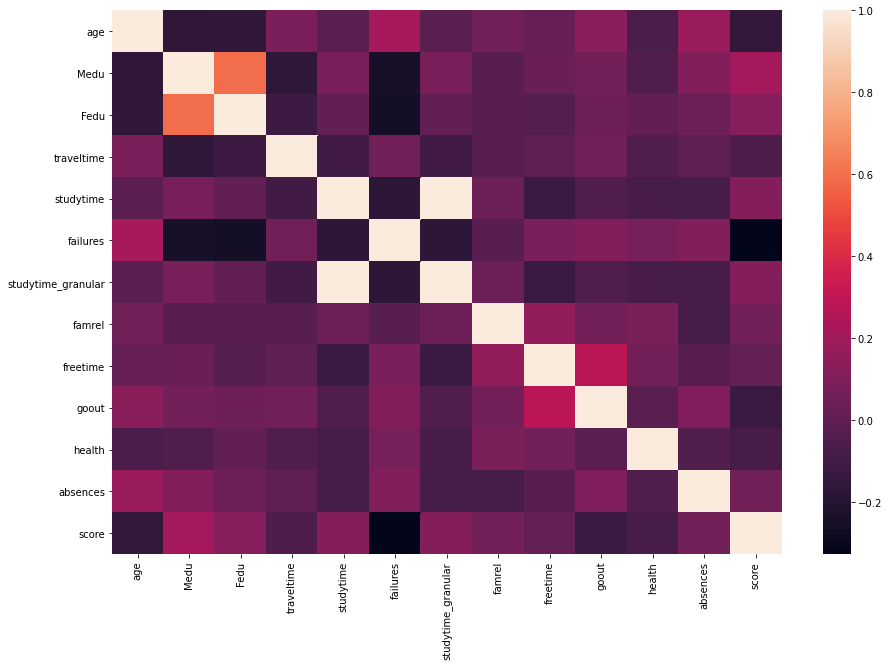

In [49]:
# Для наглядности используем heatmap

plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.corr(),)

In [50]:
# Избавляемся от данных, которые не корреляционный отбор


df.drop(['traveltime', 'studytime_granular', 'famrel', 'freetime',
        'health'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      390 non-null    object 
 1   sex         390 non-null    object 
 2   age         390 non-null    int64  
 3   address     390 non-null    object 
 4   famsize     390 non-null    object 
 5   Pstatus     390 non-null    object 
 6   Medu        390 non-null    float64
 7   Fedu        390 non-null    float64
 8   Mjob        390 non-null    object 
 9   Fjob        390 non-null    object 
 10  reason      390 non-null    object 
 11  guardian    390 non-null    object 
 12  studytime   390 non-null    float64
 13  failures    390 non-null    float64
 14  schoolsup   390 non-null    object 
 15  famsup      390 non-null    object 
 16  paid        390 non-null    object 
 17  activities  390 non-null    object 
 18  nursery     390 non-null    object 
 19  higher      390 non-null    o

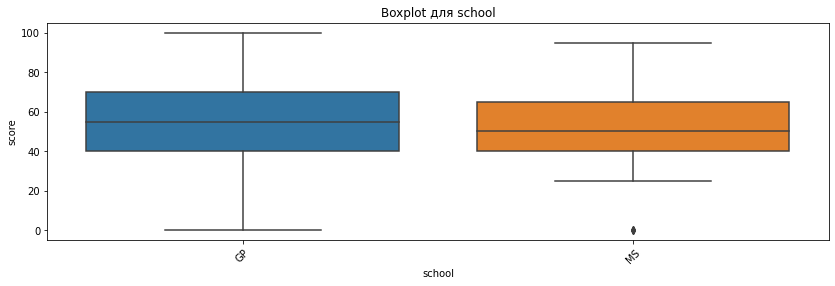

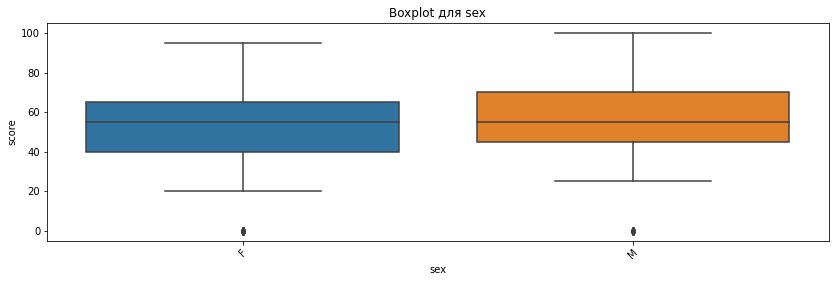

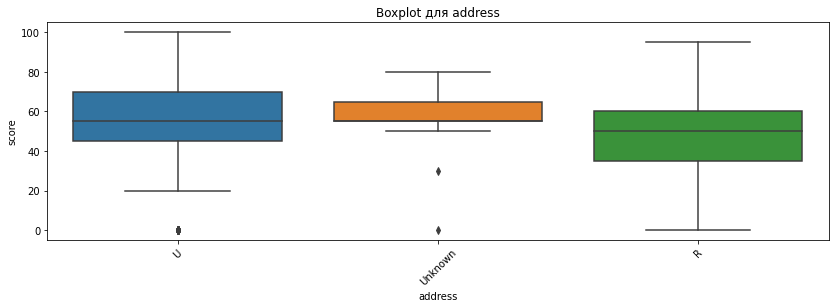

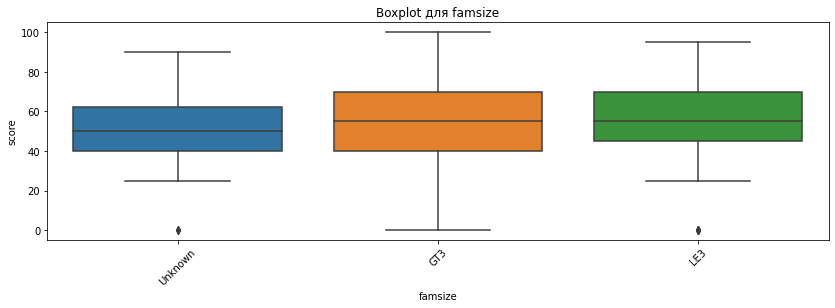

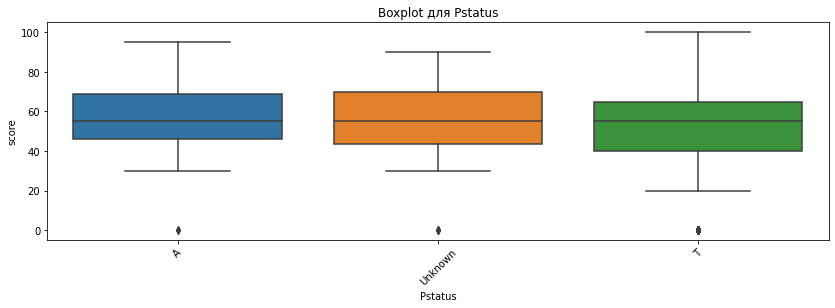

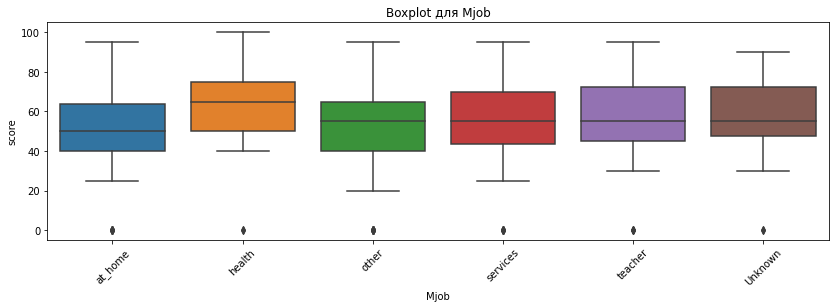

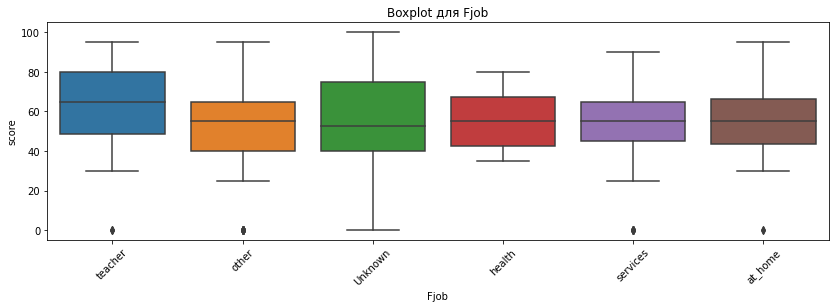

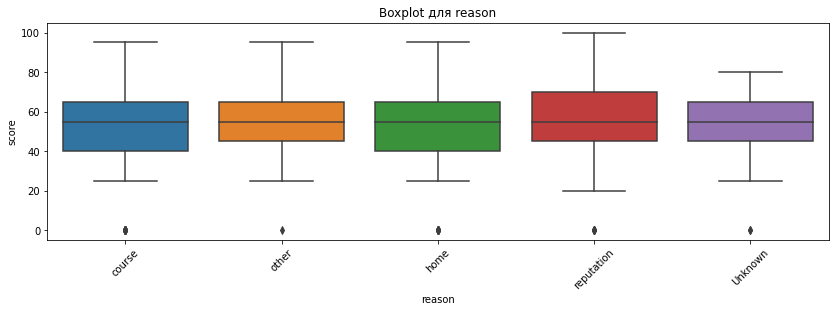

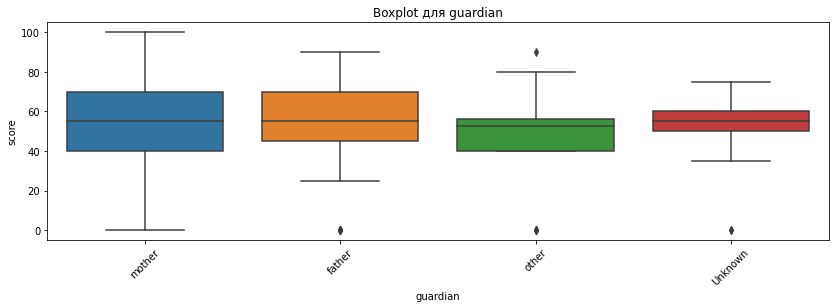

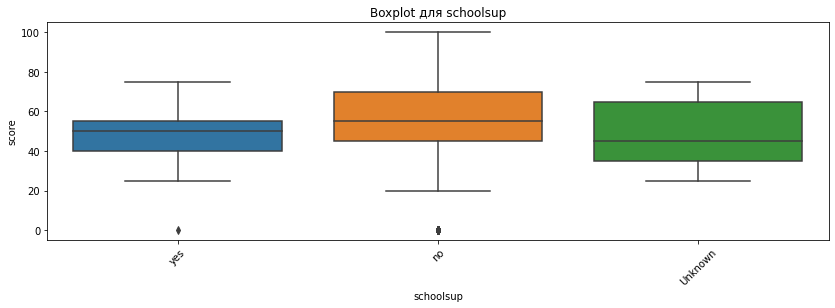

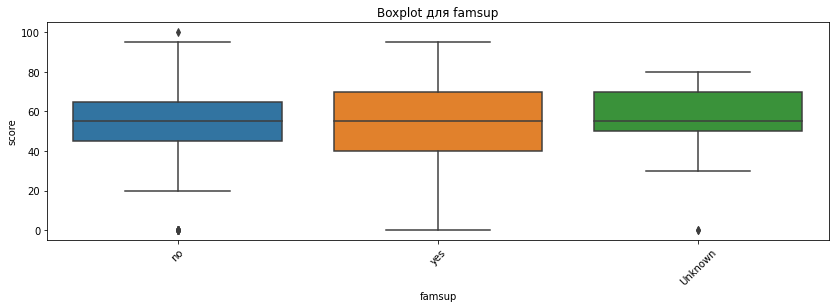

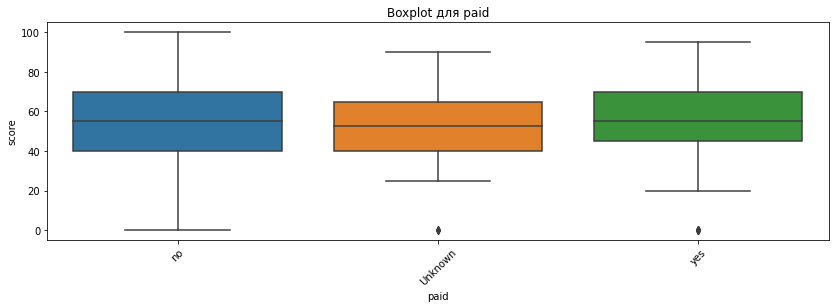

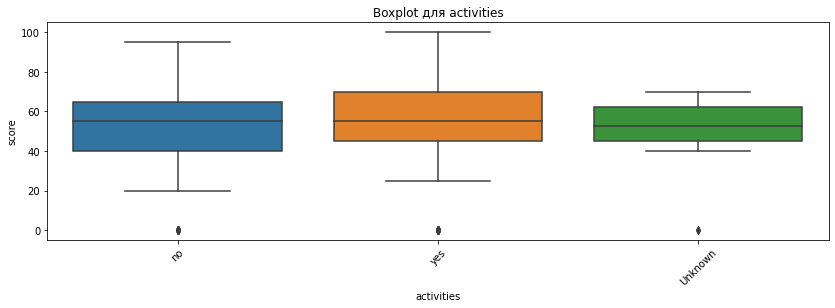

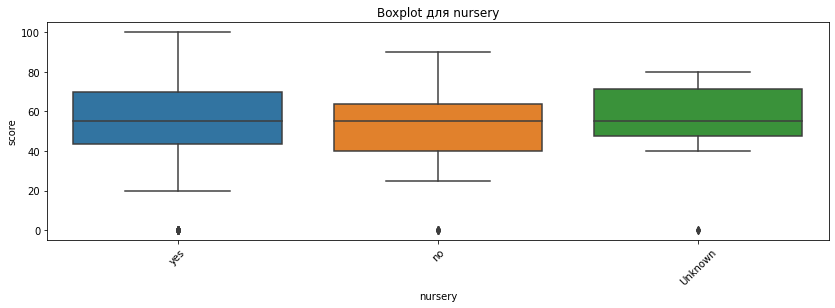

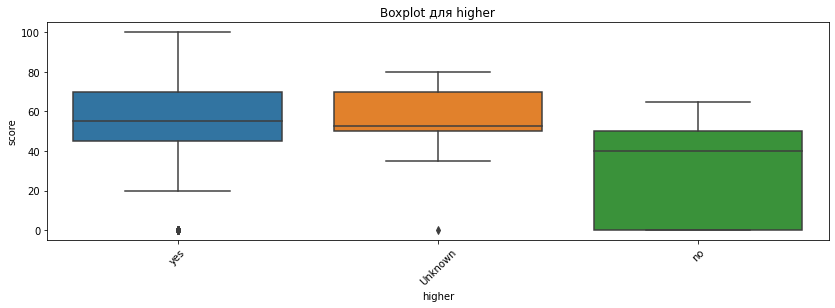

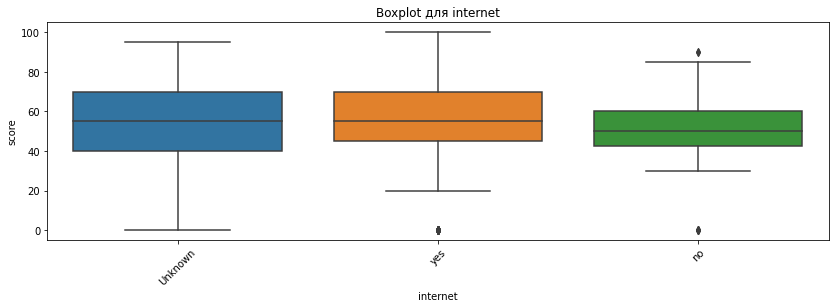

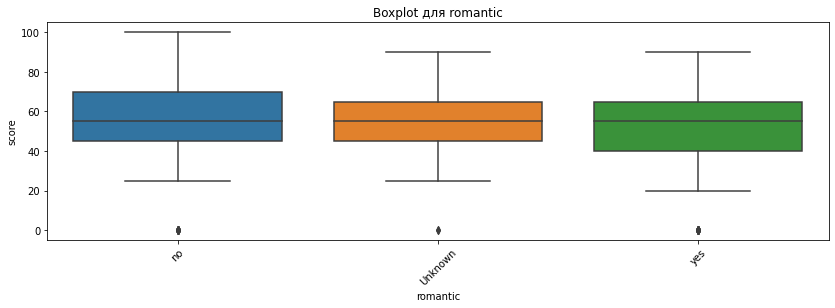

In [51]:
# Анализ номинативных переменных при помощи заготовленной функции 

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [52]:
# Проверка данных по нулевой гипотезе

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [53]:
# Подготовка данных для дальнейшего построения модели

df_for_model = df.loc[:, ['sex', 'higher', 'romantic', 'age', 'Medu', 'Fedu',
                          'studytime', 'failures', 'goout', 'absences']]
df_for_model.head(10)

,sex,higher,romantic,age,Medu,Fedu,studytime,failures,goout,absences
0,F,yes,no,18,4.0,4.0,2.0,0.0,4.0,6.0
1,F,yes,no,17,1.0,1.0,2.0,0.0,3.0,4.0
2,F,yes,Unknown,15,1.0,1.0,2.0,3.0,2.0,10.0
3,F,yes,yes,15,4.0,2.0,3.0,0.0,2.0,2.0
4,F,yes,no,16,3.0,3.0,2.0,0.0,2.0,4.0
5,M,yes,no,16,4.0,3.0,2.0,0.0,2.0,10.0
6,M,yes,no,16,2.0,2.0,2.0,0.0,4.0,0.0
7,F,yes,no,17,4.0,4.0,2.0,0.0,4.0,6.0
8,M,yes,no,15,3.0,2.0,2.0,0.0,2.0,0.0
9,M,yes,no,15,3.0,4.0,2.0,0.0,1.0,0.0


# Создадим dummy переменные из категориальных признаков

In [54]:
gender = {}

for item in df.sex:
    gender[item] =0

for item in gender:
    df_for_model[item] = df_for_model['sex'].apply(find_item)

In [55]:
higher = {}

for item in df.higher:
    higher[item] =0

for item in higher:
    df_for_model['higher_'+item] = df_for_model['higher'].apply(find_item)

In [56]:
romantic = {}

for item in df.romantic:
    romantic[item] =0

for item in romantic:
    df_for_model['romantic_'+item] = df_for_model['romantic'].apply(find_item)

In [57]:
# Удалим Unknown переменные
df_for_model.drop(['higher_Unknown','romantic_Unknown'], inplace = True, axis = 1)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [58]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df_for_model.drop(['sex', 'higher', 'romantic'], axis = 1)
y = df['score']

In [59]:
X.columns

Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'goout', 'absences',
       'F', 'M', 'higher_yes', 'higher_no', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [60]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [61]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [62]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [63]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [66]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 14.318367346938773


<AxesSubplot:>

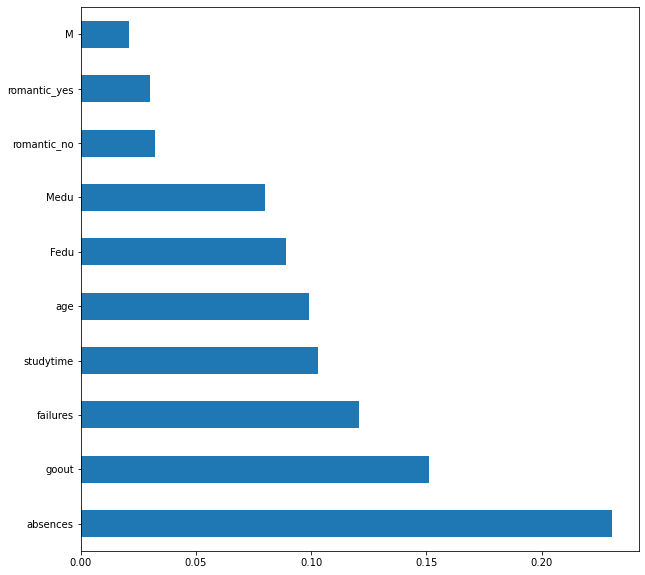

In [67]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')